# Capstone Project = The Batthe of the Neighborhoods (Week 2)
Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction & Problem Description <a name="introduction"></a>

Gran Canaria is an island on the Northwest coast of Africa, belonging to Spain. It is a popular touristic destination with over 3.5 million tourists yearly. [1]
<br>
Las Palmas de Gran Canaria is the capital city of the Island. The amount of ice-cream shops is still somewhat scarce in comparison to the number of tourists and the many outdoors amenities that are present.
<br>Finding a good location for a new ice-cream shop is essential, maybe even more so than other types of stores. As Las Palmas de Gran Canaria has several touristic areas with each their differences it can be quite challenging to find the best spot.

## Data <a name="data"></a>

To be able to analyze this problem I made use of the following data:
- The information about the different neighborhoods of Las Palmas de Gran Canaria were
gathered from the Spanish Wikipedia page. I scraped the website using the Python
BeautifulSoup library. [3]
- I gathered the coordinates of Las Palmas de Gran Canaria and the different
neighborhoods with the Python GeoPy library. [4]
- With the Foursquare API I gather the venues in the different neighborhoods of Las
Palmas de G.C. As Foursquare provides a lot of diversity in the venue categories, I
brought them together in bigger logical groups. (e.g. several types of restaurants will be
grouped under the common name “restaurant”) [5]
- For the mapping visualizations, OpenStreetMap has been used with the Python Folium
library. [6]

## Methodology <a name="methodology"></a>

Let us first gather the coordinates from Las Palmas de Gran Canaria and from the different Neighborhoods.
### Las Palmas de Gran Canaria

In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [2]:
from geopy.geocoders import Nominatim # convert addresses into latitude and longitude values

address = 'Las Palmas de Gran Canaria, Spain'
geolocator = Nominatim(user_agent = 'ua')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Las Palmas de Gran Canaria are: {}, {}.'.format(latitude,longitude))
lpgc_latitude = latitude
lpgc_longitude = longitude

The coordinates of Las Palmas de Gran Canaria are: 28.128874, -15.4349448.


### The neighborhoods

In [3]:
!conda install -c conda-forge bs4 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |   py36h9f0ad1d_0         160 KB  conda-forge
    bs4-4.9.0                  |                0           4 KB  conda-forge
    soupsieve-1.9.4            |   py36h9f0ad1d_1          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         222 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.0-py36h9f0ad1d_0
  bs4                conda-forge/noarch::bs4-4.9.0-0
  soupsieve          conda-forge/linux-64::soupsieve-1.9.4-py36h9f0ad1d_1



soupsieve-1.9.4      | 58 KB     | ##################################### | 100% 
beautifuls

In [4]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd

# get url
laspalmas_url = r.get('https://es.wikipedia.org/wiki/Anexo:Barrios_de_Las_Palmas_de_Gran_Canaria').text
# parse it with BeautifulSoup
soup = BeautifulSoup(laspalmas_url, 'html.parser')
# the first table is the map and logo. We do not need that.
# the second table contains our neighborhood information
table = soup.find_all('table')[1]
# get all rows in table and store them in a variable called rows
laspalmas_rows = table.findAll('tr')
# create an empty list to store values of the table.
data = []

# iterate through all rows of table skipping first row as that it's a heading row
for row in laspalmas_rows[1:]:
    # get all columns in current row of the table
    columns = row.find_all('td')
    # get all column values in current row of table and store them in a list variable called values
    values = [element.text.strip() for element in columns]
    # append values to our main data variable
    data.append(values)

# get headings of table and store them in a variable
laspalmas_headings = [ele.text.strip() for ele in laspalmas_rows[0].findAll('th')]

# create a pandas dataframe with our data
df = pd.DataFrame(data, columns=laspalmas_headings)

In [5]:
df.head()

,Sector,Distrito,Barrio,Población (2007)[1]​
0,12 Tafira,"01 Vegueta, Cono Sur y Tafira",Campus Universitario,25
1,02 San Cristóbal,"01 Vegueta, Cono Sur y Tafira",Casablanca I,3.247
2,01 Marzagán,"01 Vegueta, Cono Sur y Tafira",Cuesta Ramón,606
3,12 Tafira,"01 Vegueta, Cono Sur y Tafira",Diseminado de La Montañeta,50
4,01 Marzagán,"01 Vegueta, Cono Sur y Tafira",Diseminado de Los Hoyos,249


We need to clean up a bit the data and change the column titles to English before we can use it.

In [6]:
# the districts ans sectors have a number prefex. We are not interested in those, so lets remove them.
df['Sector'] = df['Sector'].str[3:]
df['Distrito'] = df['Distrito'].str[3:]

In [7]:
df.head()

,Sector,Distrito,Barrio,Población (2007)[1]​
0,Tafira,"Vegueta, Cono Sur y Tafira",Campus Universitario,25
1,San Cristóbal,"Vegueta, Cono Sur y Tafira",Casablanca I,3.247
2,Marzagán,"Vegueta, Cono Sur y Tafira",Cuesta Ramón,606
3,Tafira,"Vegueta, Cono Sur y Tafira",Diseminado de La Montañeta,50
4,Marzagán,"Vegueta, Cono Sur y Tafira",Diseminado de Los Hoyos,249


In [8]:
# we only need the first two columns
df_lpgc = df[['Sector','Distrito']].copy()
# lets drop the duplicates
df_lpgc = df_lpgc.drop_duplicates()
# change the language of the column titles to English
df_lpgc.columns = ['Neighborhood','District']
# and persist the dataframe for future use
df_lpgc.to_csv("LPGC_neighborhoods.csv", index=False)

#### The venues

We will be using the Foursquare API to gather the venues in the different neighborhoods.

In [9]:
import requests

In [10]:
CLIENT_ID = '1HABFONPEEOMT0AS2GVXPK53A4EO43AXRTJVN3B03CG3N3BE' # my Foursquare ID
CLIENT_SECRET = '0CR2ZL5CZHLX5OSIIJRZCBPXGCC1TIS2HQ04CUYLFBFRBG1Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 2000
LIMIT = 500

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sector','Sector Latitude', 'Sector Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return( nearby_venues)

In [12]:
df_lpgc = pd.read_csv('LasPalmas.csv', sep=';')

In [13]:
#get venues for all laspalmas neighborhoods and create a dataframe of them
laspalmas_venues = getNearbyVenues(names=df_lpgc['Sector'],
                                   latitudes=df_lpgc['Latitude'],
                                   longitudes=df_lpgc['Longitude']
                                  )

Arenales
Escaleritas
Guanarteme
La Isleta
La Paterna
Las Rehoyas
Las Torres
Marzagán
San Cristóbal
San Lorenzo
Santa Catalina
Schamann
Tafira
Tamaraceite
Vegueta-Triana


In [14]:
print(laspalmas_venues.shape)

(881, 7)


In [15]:
laspalmas_venues.head()

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arenales,28.127046,-15.435841,Café Regina,28.132676,-15.437066,Coffee Shop
1,Arenales,28.127046,-15.435841,Gelizia,28.133460,-15.436390,Ice Cream Shop
2,Arenales,28.127046,-15.435841,Av. José Mesa y López,28.131981,-15.438045,Road
3,Arenales,28.127046,-15.435841,La Tasca de los Vinos,28.132829,-15.436586,Spanish Restaurant
4,Arenales,28.127046,-15.435841,Restaurante Fuji,28.134796,-15.438009,Japanese Restaurant


In [16]:
# persist our results to a file
laspalmas_venues.to_csv("LasPalmas_Venues.csv", index=False)

#### Data Wrangling

To be able to use our data we will have to make some modifications to it.

In [439]:
import pandas as pd

# disable the limit for the row amount
pd.set_option('display.max_rows', None)

# retrieve the venues we generated previously.
laspalmas_venues = pd.read_csv("LasPalmas_Venues.csv")

In [440]:
# lets have a look at the data
laspalmas_venues.head(5)

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arenales,28.127046,-15.435841,Café Regina,28.132676,-15.437066,Coffee Shop
1,Arenales,28.127046,-15.435841,Gelizia,28.133460,-15.436390,Ice Cream Shop
2,Arenales,28.127046,-15.435841,Av. José Mesa y López,28.131981,-15.438045,Road
3,Arenales,28.127046,-15.435841,La Tasca de los Vinos,28.132829,-15.436586,Spanish Restaurant
4,Arenales,28.127046,-15.435841,Restaurante Fuji,28.134796,-15.438009,Japanese Restaurant


In [441]:
# how many unique categories do we have?
nu=len(laspalmas_venues['Venue Category'].unique()) 
print('There are {} unique categories.'.format(nu))

There are 114 unique categories.


In [442]:
laspalmas_venues[laspalmas_venues['Venue Category'].str.contains("Restaurant")].groupby('Venue Category').count().head(5)

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Argentinian Restaurant,8,8,8,8,8,8
Asian Restaurant,8,8,8,8,8,8
Chinese Restaurant,3,3,3,3,3,3
Comfort Food Restaurant,3,3,3,3,3,3
Fast Food Restaurant,15,15,15,15,15,15


There are several types of categories, but the categories are very diverse and not all of them will be relevant for our decision.
<br>Lets first try to regroup categories to bigger groups.
<br>Taking the above dataset result as an example, we can group all **Restaurant** categories together.

In [443]:
# all categories that have the word Restaurant in it will be changed to Restaurant
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Restaurant.*$)', 'Restaurant')

In [444]:
laspalmas_venues[laspalmas_venues['Venue Category'].str.contains("Restaurant")].groupby('Venue Category').count().head(5)

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Restaurant,332,332,332,332,332,332


We will now proceed doing this for a several other categories

In [445]:
# Lets group all types of restaurants together
# laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Restaurant.*$)', 'Restaurant')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*BBQ.*$)', 'Restaurant')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Diner.*$)', 'Restaurant')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Steakhouse.*$)', 'Restaurant')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Museum.*$)', 'Culture')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Art.*$)', 'Culture')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Aquarium.*$)', 'Culture')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Historic.*$)', 'Culture')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Theater.*$)', 'Culture')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Burger.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Sandwich.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Pizza.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Hot Dog.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Donut.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Food & Drink.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Food Truck.*$)', 'Fastfood')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Salad.*$)', 'Fastfood')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Tea.*$)', 'Coffee/Tea Room')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Coffee Shop.*$)', 'Coffee/Tea Room')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Sport.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Basketball.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Surf.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Gym.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Stadium.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Tennis.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Golf.*$)', 'Sport')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Pool.*$)', 'Sport')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Park.*$)', 'Outdoors')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Garden.*$)', 'Outdoors')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Playground.*$)', 'Outdoors')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Plaza.*$)', 'Outdoors')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Scenic Lookout.*$)', 'Outdoors')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Outdoors.*$)', 'Outdoors')


laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Pub.*$)', 'Drinks')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Café.*$)', 'Drinks')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Bar.*$)', 'Drinks')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Brewery.*$)', 'Drinks')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Hostel.*$)', 'Hotel')

laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Shopping.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Clothing.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Women.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Bookstore.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Electronics.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Store.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Dessert Shop.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Cupcake.*$)', 'Shops')
laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Miscellaneous Shop.*$)', 'Shops')


#laspalmas_venues['Venue Category'] = laspalmas_venues['Venue Category'].str.replace(r'(^.*Garden.*$)', 'Shops')

Let's have a look at the categories we have left now:

In [446]:
# lets check again how many categories we have
nu=len(laspalmas_venues['Venue Category'].unique()) #number of uniques categories
print('There are {} unique categories.'.format(nu))

There are 36 unique categories.


In [447]:
# group all the venues from Las Palmas de Gran Canaria
laspalmas_venues.groupby('Venue Category').count().sort_values(by=['Sector'], ascending=False).head(20)

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Restaurant,347,347,347,347,347,347
Shops,78,78,78,78,78,78
Outdoors,77,77,77,77,77,77
Drinks,61,61,61,61,61,61
Fastfood,47,47,47,47,47,47
Culture,38,38,38,38,38,38
Sport,36,36,36,36,36,36
Coffee/Tea Room,36,36,36,36,36,36
Hotel,27,27,27,27,27,27


In Las Palmas de Gran Canaria there are a lot of restaurants. This is a very big category and is not relevant for knowing if a place will be a good spot or not for an ice-cream shop.
<br> We will remove it from the list.

In [448]:
laspalmas_venues = laspalmas_venues[laspalmas_venues['Venue Category'] != 'Restaurant']
laspalmas_venues = laspalmas_venues[laspalmas_venues['Venue Category'] != 'Sport']

In [449]:
# lets have another look at the top venues
laspalmas_venues.groupby('Venue Category').count().sort_values(by=['Sector'], ascending=False).head()

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Shops,78,78,78,78,78,78
Outdoors,77,77,77,77,77,77
Drinks,61,61,61,61,61,61
Fastfood,47,47,47,47,47,47
Culture,38,38,38,38,38,38


In [450]:
# lets verify if our venue list is still looking clean and no errors occured.
laspalmas_venues.head()

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arenales,28.127046,-15.435841,Café Regina,28.132676,-15.437066,Coffee/Tea Room
1,Arenales,28.127046,-15.435841,Gelizia,28.133460,-15.436390,Ice Cream Shop
2,Arenales,28.127046,-15.435841,Av. José Mesa y López,28.131981,-15.438045,Road
8,Arenales,28.127046,-15.435841,Transformer Café Bar,28.133956,-15.435720,Gastropub
12,Arenales,28.127046,-15.435841,Mojo Surf,28.131468,-15.443354,Board Shop


In [451]:
# the final amount of categories we have
nu=len(laspalmas_venues['Venue Category'].unique()) #number of uniques categories
print('There are {} unique categories.'.format(nu))

There are 34 unique categories.


We less categories now and they are more relevant also. However there are still quite some smaller ones that we want to get rid of in order to get a better overview.
<br>Lets make a new dataset for our categories:

In [452]:
# bring the grouped by result in a new dataframe
venues_categories = laspalmas_venues.groupby('Venue Category').count()
# we only need once the amount of occurences
venues_categories = venues_categories[['Sector']]
# and lets our column a proper name
venues_categories.columns = ['Occurence']
# lets remove all venues with only a few occurences
venues_categories = venues_categories[venues_categories['Occurence'] >= 10]

In [453]:
# lets have another look at it
venues_categories.sort_values(by=['Occurence'], ascending=False)

,Occurence
Venue Category,
Shops,78
Outdoors,77
Drinks,61
Fastfood,47
Culture,38
Coffee/Tea Room,36
Hotel,27
Beach,18
Supermarket,16


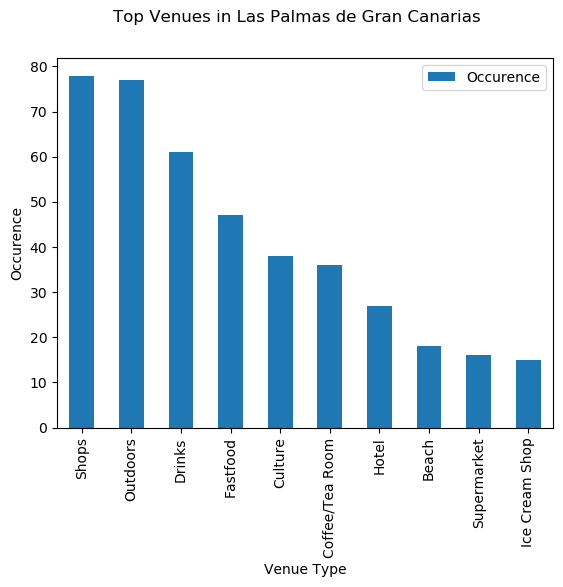

In [454]:
# lets have a look at the top venues and their occurences
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


venues_categories.sort_values(by=['Occurence'], ascending=False).plot(kind='bar')

plt.suptitle('Top Venues in Las Palmas de Gran Canarias')
plt.xlabel('Venue Type')
plt.ylabel('Occurence')
plt.savefig('TopVenuesinLPGC.png')
plt.show()

#### Prepare our dataset

We need to prepare our dataset for the algorithm we will use on it.

In [455]:
laspalmas_venues.head()

,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arenales,28.127046,-15.435841,Café Regina,28.132676,-15.437066,Coffee/Tea Room
1,Arenales,28.127046,-15.435841,Gelizia,28.133460,-15.436390,Ice Cream Shop
2,Arenales,28.127046,-15.435841,Av. José Mesa y López,28.131981,-15.438045,Road
8,Arenales,28.127046,-15.435841,Transformer Café Bar,28.133956,-15.435720,Gastropub
12,Arenales,28.127046,-15.435841,Mojo Surf,28.131468,-15.443354,Board Shop


In [456]:
#create a file with dummy values by venue category
laspalmas_dummy = pd.get_dummies(laspalmas_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
laspalmas_dummy['Sector'] = laspalmas_venues['Sector'] 
# make neighborhood the first column 
fixed_columns = [laspalmas_dummy.columns[-1]] + list(laspalmas_dummy.columns[:-1])
laspalmas_dummy = laspalmas_dummy[fixed_columns]
laspalmas_dummy.head()

,Sector,Airport Service,Bakery,Beach,Board Shop,Breakfast Spot,Bus Station,Coffee/Tea Room,College Auditorium,Concert Hall,Culture,Deli / Bodega,Drinks,Farmers Market,Fastfood,Food,Gas Station,Gastropub,Gift Shop,Gun Shop,Home Service,Hotel,Ice Cream Shop,Lounge,Market,Multiplex,Neighborhood,Nightclub,Other Repair Shop,Outdoors,Pharmacy,Road,Shops,Snack Place,Supermarket
0,Arenales,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arenales,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Arenales,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,Arenales,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Arenales,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [457]:
pd.set_option('display.max_columns', None)
laspalmas_dummy.groupby('Sector').sum().sort_values(by=['Ice Cream Shop'], ascending=False).reset_index().head()

,Sector,Airport Service,Bakery,Beach,Board Shop,Breakfast Spot,Bus Station,Coffee/Tea Room,College Auditorium,Concert Hall,Culture,Deli / Bodega,Drinks,Farmers Market,Fastfood,Food,Gas Station,Gastropub,Gift Shop,Gun Shop,Home Service,Hotel,Ice Cream Shop,Lounge,Market,Multiplex,Neighborhood,Nightclub,Other Repair Shop,Outdoors,Pharmacy,Road,Shops,Snack Place,Supermarket
0,Arenales,0,0,4,1,1,0,6,0,1,3,1,10,0,3,0,0,1,0,0,0,6,3,0,0,1,0,2,0,8,0,1,4,0,0
1,Guanarteme,0,0,4,1,0,0,6,0,1,4,0,11,0,3,0,0,1,0,0,0,5,3,0,1,1,0,2,0,8,0,1,2,0,0
2,Santa Catalina,0,0,4,1,0,0,6,0,1,4,0,10,0,3,0,0,1,0,0,0,6,3,0,1,1,1,2,0,6,0,1,2,0,0
3,La Isleta,0,0,3,0,0,0,6,0,0,5,0,6,0,8,0,0,0,0,0,0,6,2,1,1,0,1,2,1,5,0,0,3,0,0
4,Las Rehoyas,0,0,0,0,2,0,1,0,1,7,1,3,2,5,0,0,0,0,0,0,1,1,1,0,0,0,0,0,9,0,0,9,0,3


Some areas have already several Ice Cream Shops: Arenales, Guanarteme, Santa Catalina and La Isleta.
<br>This is not good as it will mean there are more competitors.
<br> On the other side, if there are enough beaches, there will be enough tourist activity for several ice-cream shops.
<br> There for we will filter all areas out that have more than one ice-cream shop and less then 3 beaches.

In [458]:
# let us check the neighboorhoods where there are already several ice-cream shops and not enough beaches
pd.set_option('display.max_columns', None)
grp = laspalmas_dummy.groupby('Sector').sum().sort_values(by=['Outdoors'], ascending=False).reset_index()
tmp_grp = grp[(grp['Ice Cream Shop'] >= 2) & (grp['Beach'] <= 3)] 
tmp_grp

,Sector,Airport Service,Bakery,Beach,Board Shop,Breakfast Spot,Bus Station,Coffee/Tea Room,College Auditorium,Concert Hall,Culture,Deli / Bodega,Drinks,Farmers Market,Fastfood,Food,Gas Station,Gastropub,Gift Shop,Gun Shop,Home Service,Hotel,Ice Cream Shop,Lounge,Market,Multiplex,Neighborhood,Nightclub,Other Repair Shop,Outdoors,Pharmacy,Road,Shops,Snack Place,Supermarket
8,La Isleta,0,0,3,0,0,0,6,0,0,5,0,6,0,8,0,0,0,0,0,0,6,2,1,1,0,1,2,1,5,0,0,3,0,0


**La Isleta** doesn't fit our cirteria, so we will remove it from our list.

In [459]:
laspalmas_dummy = laspalmas_dummy[laspalmas_dummy.Sector != 'La Isleta']

We group the different sectors:

In [460]:
laspalmas_group = laspalmas_dummy.groupby('Sector').mean().reset_index()

In [461]:
# lets check the results
laspalmas_group.head()

,Sector,Airport Service,Bakery,Beach,Board Shop,Breakfast Spot,Bus Station,Coffee/Tea Room,College Auditorium,Concert Hall,Culture,Deli / Bodega,Drinks,Farmers Market,Fastfood,Food,Gas Station,Gastropub,Gift Shop,Gun Shop,Home Service,Hotel,Ice Cream Shop,Lounge,Market,Multiplex,Neighborhood,Nightclub,Other Repair Shop,Outdoors,Pharmacy,Road,Shops,Snack Place,Supermarket
0,Arenales,0.00,0.000000,0.071429,0.017857,0.017857,0.0,0.107143,0.0,0.017857,0.053571,0.017857,0.178571,0.000000,0.053571,0.00,0.0,0.017857,0.0,0.0,0.000000,0.107143,0.053571,0.000000,0.000000,0.017857,0.0,0.035714,0.0,0.142857,0.0,0.017857,0.071429,0.00,0.000000
1,Escaleritas,0.00,0.026316,0.000000,0.000000,0.026316,0.0,0.026316,0.0,0.000000,0.026316,0.026316,0.157895,0.026316,0.105263,0.00,0.0,0.000000,0.0,0.0,0.026316,0.026316,0.000000,0.026316,0.000000,0.026316,0.0,0.000000,0.0,0.184211,0.0,0.000000,0.210526,0.00,0.078947
2,Guanarteme,0.00,0.000000,0.074074,0.018519,0.000000,0.0,0.111111,0.0,0.018519,0.074074,0.000000,0.203704,0.000000,0.055556,0.00,0.0,0.018519,0.0,0.0,0.000000,0.092593,0.055556,0.000000,0.018519,0.018519,0.0,0.037037,0.0,0.148148,0.0,0.018519,0.037037,0.00,0.000000
3,La Paterna,0.04,0.000000,0.000000,0.000000,0.000000,0.0,0.080000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.04,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.0,0.000000,0.0,0.160000,0.0,0.000000,0.400000,0.04,0.040000
4,Las Rehoyas,0.00,0.000000,0.000000,0.000000,0.043478,0.0,0.021739,0.0,0.021739,0.152174,0.021739,0.065217,0.043478,0.108696,0.00,0.0,0.000000,0.0,0.0,0.000000,0.021739,0.021739,0.021739,0.000000,0.000000,0.0,0.000000,0.0,0.195652,0.0,0.000000,0.195652,0.00,0.065217


Lets make a dataset with the top 5 venues per neigborhood:

In [462]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [463]:
num_top_venues = 5

import numpy as np

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Sector']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Sector'] = laspalmas_group['Sector']



for ind in np.arange(laspalmas_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(laspalmas_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Sector,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arenales,Drinks,Outdoors,Coffee/Tea Room,Hotel,Shops
1,Escaleritas,Shops,Outdoors,Drinks,Fastfood,Supermarket
2,Guanarteme,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture
3,La Paterna,Shops,Fastfood,Outdoors,Coffee/Tea Room,Supermarket
4,Las Rehoyas,Shops,Outdoors,Culture,Fastfood,Supermarket
5,Las Torres,Outdoors,Drinks,Shops,Fastfood,Supermarket
6,Marzagán,Shops,Fastfood,Gift Shop,Beach,Farmers Market
7,San Cristóbal,Outdoors,Supermarket,Culture,College Auditorium,Shops
8,San Lorenzo,Shops,Supermarket,Culture,Coffee/Tea Room,Bakery
9,Santa Catalina,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture


In [464]:
kclusters = 6
from sklearn.cluster import KMeans

laspalmas_group_clustering = laspalmas_group.drop('Sector',1)

kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(laspalmas_group_clustering)

kmeans.labels_

array([2, 0, 2, 1, 0, 0, 1, 5, 3, 2, 0, 4, 1, 0], dtype=int32)

In [465]:
df_n = pd.read_csv('LasPalmas.csv', sep=';')
df_n = df_n[df_n.Sector != 'La Isleta']


In [466]:
laspalmas_merged = df_n

#add clustering labels
laspalmas_merged['Cluster'] = kmeans.labels_

# merge both to add latitude/longitude for each neighborhood
laspalmas_merged = laspalmas_merged.join(neighborhoods_venues_sorted.set_index('Sector'), on='Sector')


In [467]:
laspalmas_merged

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centro,Arenales,28.127046,-15.435841,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Shops
1,Ciudad Alta,Escaleritas,28.112111,-15.439356,0,Shops,Outdoors,Drinks,Fastfood,Supermarket
2,Puerto-Canteras,Guanarteme,28.133622,-15.439566,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture
4,Ciudad Alta,La Paterna,28.091035,-15.450816,1,Shops,Fastfood,Outdoors,Coffee/Tea Room,Supermarket
5,Ciudad Alta,Las Rehoyas,28.107005,-15.431840,0,Shops,Outdoors,Culture,Fastfood,Supermarket
6,Ciudad Alta,Las Torres,28.119548,-15.444735,0,Outdoors,Drinks,Shops,Fastfood,Supermarket
7,"Vegueta, Cono Sur y Tafira",Marzagán,28.039574,-15.419519,1,Shops,Fastfood,Gift Shop,Beach,Farmers Market
8,"Vegueta, Cono Sur y Tafira",San Cristóbal,28.082157,-15.415947,5,Outdoors,Supermarket,Culture,College Auditorium,Shops
9,Tamaraceite-San Lorenzo,San Lorenzo,28.081055,-15.476745,3,Shops,Supermarket,Culture,Coffee/Tea Room,Bakery
10,Puerto-Canteras,Santa Catalina,28.139699,-15.435295,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map
map_clusters = folium.Map(location=[lpgc_latitude, lpgc_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(laspalmas_merged['Latitude'], laspalmas_merged['Longitude'], laspalmas_merged['Sector'], laspalmas_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [469]:
laspalmas_merged[laspalmas_merged.Cluster == 0]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Ciudad Alta,Escaleritas,28.112111,-15.439356,0,Shops,Outdoors,Drinks,Fastfood,Supermarket
5,Ciudad Alta,Las Rehoyas,28.107005,-15.431840,0,Shops,Outdoors,Culture,Fastfood,Supermarket
6,Ciudad Alta,Las Torres,28.119548,-15.444735,0,Outdoors,Drinks,Shops,Fastfood,Supermarket
11,Ciudad Alta,Schamann,28.111440,-15.433229,0,Shops,Outdoors,Fastfood,Drinks,Supermarket
14,"Vegueta, Cono Sur y Tafira",Vegueta-Triana,28.100697,-15.415786,0,Outdoors,Culture,Shops,Fastfood,Drinks


Cluster 2

In [470]:
laspalmas_merged[laspalmas_merged.Cluster == 1]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Ciudad Alta,La Paterna,28.091035,-15.450816,1,Shops,Fastfood,Outdoors,Coffee/Tea Room,Supermarket
7,"Vegueta, Cono Sur y Tafira",Marzagán,28.039574,-15.419519,1,Shops,Fastfood,Gift Shop,Beach,Farmers Market
13,Tamaraceite-San Lorenzo,Tamaraceite,28.098268,-15.472874,1,Shops,Coffee/Tea Room,Fastfood,Bus Station,Snack Place


Cluster 3

In [471]:
laspalmas_merged[laspalmas_merged.Cluster == 2]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centro,Arenales,28.127046,-15.435841,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Shops
2,Puerto-Canteras,Guanarteme,28.133622,-15.439566,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture
10,Puerto-Canteras,Santa Catalina,28.139699,-15.435295,2,Drinks,Outdoors,Coffee/Tea Room,Hotel,Culture


Cluster 4

In [472]:
laspalmas_merged[laspalmas_merged.Cluster == 3]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Tamaraceite-San Lorenzo,San Lorenzo,28.081055,-15.476745,3,Shops,Supermarket,Culture,Coffee/Tea Room,Bakery


Cluster 5

In [473]:
laspalmas_merged[laspalmas_merged.Cluster == 4]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,"Vegueta, Cono Sur y Tafira",Tafira,28.070505,-15.452841,4,Shops,Snack Place,Pharmacy,Outdoors,Drinks


Cluster 6

In [474]:
laspalmas_merged[laspalmas_merged.Cluster == 5]

,District,Sector,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,"Vegueta, Cono Sur y Tafira",San Cristóbal,28.082157,-15.415947,5,Outdoors,Supermarket,Culture,College Auditorium,Shops


elbow method

In [477]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(laspalmas_group_clustering)
    distortions.append(kmeanModel.inertia_)

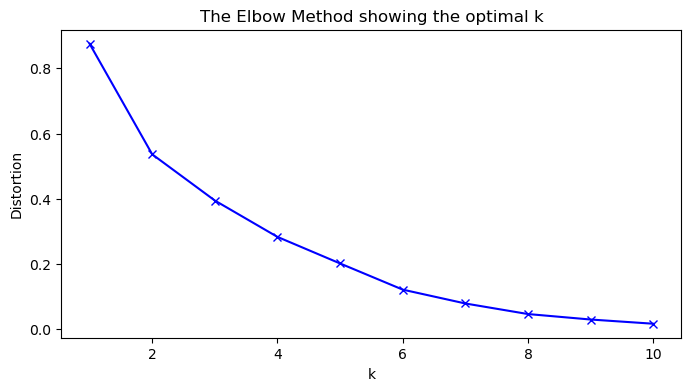

In [478]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()